<a href="https://colab.research.google.com/github/NombuleloZizi/Prediction-of-Product-Sales/blob/main/Project__1_Part_3_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales


#Part 1: Project 1 & 2

*   Author: Nombulelo Zizi


#Project Overview


#Load and Inspect Data


In [ ]:
# Import required packages
import pandas as pd # import pandas
import missingno as msno # import missingo
import matplotlib.pyplot as plt
import seaborn as sns

#load the data file path
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
#read the file
df_sales = pd.read_csv(fpath)
#preview the first row
df_sales.head()
#preview summary of DataFrame's columns
#df_sales.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Clean Data



**How many rows are there?**
- `8523`

**How many columns are there?**
- `12`

**How many numeric columns?**
- `5`

**How many categorical/string columns are there (dtype='object')?**
- `7`


In [ ]:
# Use .select_dtypes to view only object columns
# Identify string columns
cat_cols = df_sales.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# save list of numeric column names
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df_sales.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0

In [ ]:
# Get the number of null values for all columns and save as a variable
null_sums = df_sales.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

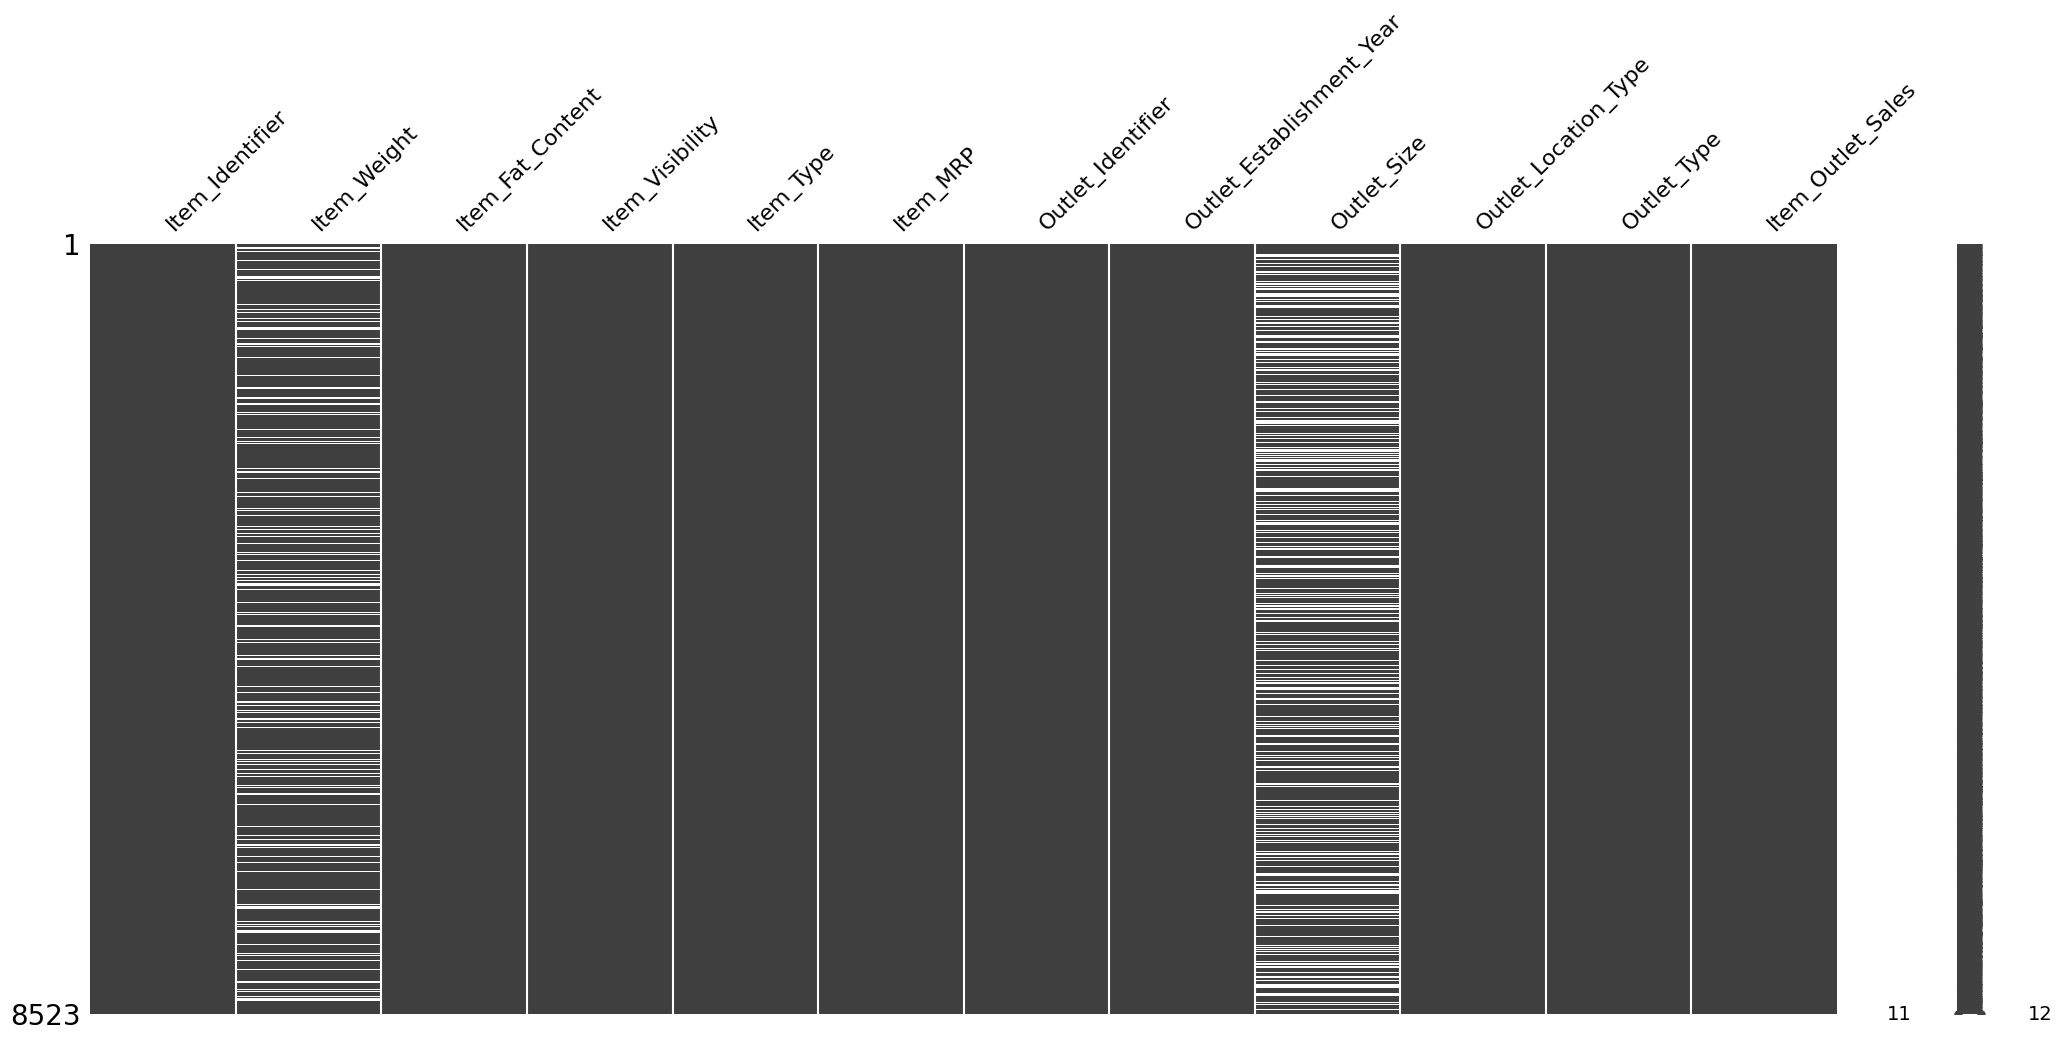

In [ ]:
msno.matrix(df_sales);

In [ ]:
# use the list of cat columns to fill null values with MISSING
df_sales[cat_cols] = df_sales[cat_cols].fillna("MISSING")


In [ ]:
# save list of numeric column names
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# use the list of num columns to fill null values with -1
df_sales[num_cols] = df_sales[num_cols].fillna(-1)


In [ ]:
# Confirm no more nulls using Pandas
null_sums_all = df_sales.isna().sum()
null_sums_all

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
string_cols = df_sales.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
# Check for inconsistencies by inspecting the values_counts for Item_Fat_Content
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Standardize the values in the Central column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular','low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
for col in num_cols:
  print(f"Summary statistics for {col}:")
  print(f"Min: {df_sales[col].min()}")
  print(f"Max: {df_sales[col].max()}")
  print(f"Mean: {df_sales[col].mean().round(2)}")
  # Increasing readability by adding an empty line
  print('\n')

Summary statistics for Item_Weight:
Min: -1.0
Max: 21.35
Mean: 10.48


Summary statistics for Item_Visibility:
Min: 0.0
Max: 0.328390948
Mean: 0.07


Summary statistics for Item_MRP:
Min: 31.29
Max: 266.8884
Mean: 140.99


Summary statistics for Outlet_Establishment_Year:
Min: 1985
Max: 2009
Mean: 1997.83


Summary statistics for Item_Outlet_Sales:
Min: 33.29
Max: 13086.9648
Mean: 2181.29




#Exploratory Data Analysis


Part1: Project 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.


In [ ]:
# Checking info again
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Explanatory Data Analysis

- Histograms to view the distributions of numerical features in your dataset.

In [ ]:
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- For each numeric feature, we will plot the distribution and a boxplot.

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

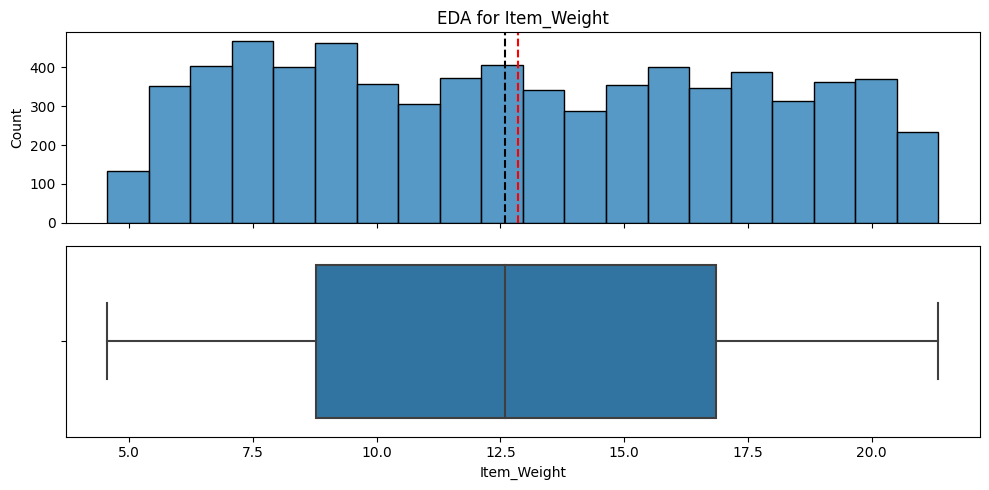

In [ ]:
plot_numeric(df_sales,'Item_Weight')

- You can clearly see that the median is around 12.5 for this particular column.
- The boxplot doesn't shows that there are some outliers in terms of Item_Weight.

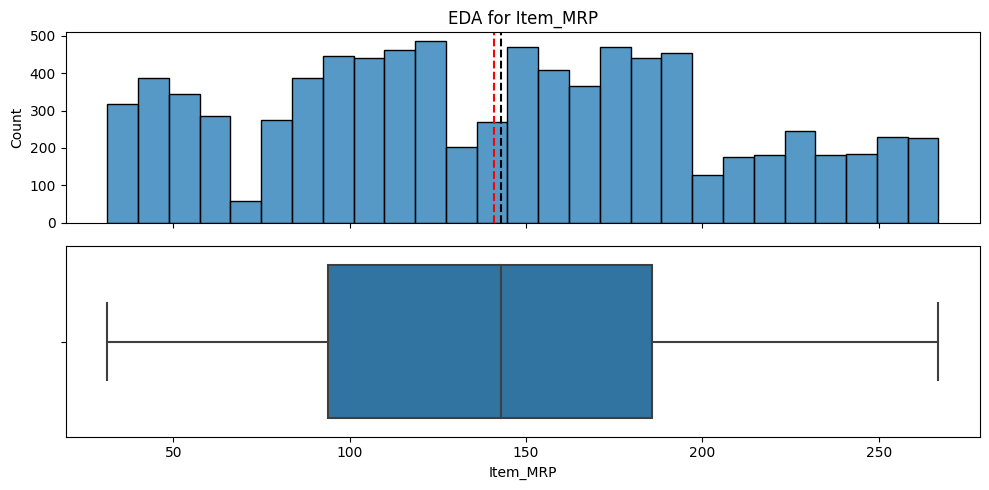

In [ ]:
plot_numeric(df_sales,'Item_MRP')


- You can clearly see that the median is around 140 for this particular column.
- The boxplot doesn't shows that there are some outliers in terms of Item_MRP.

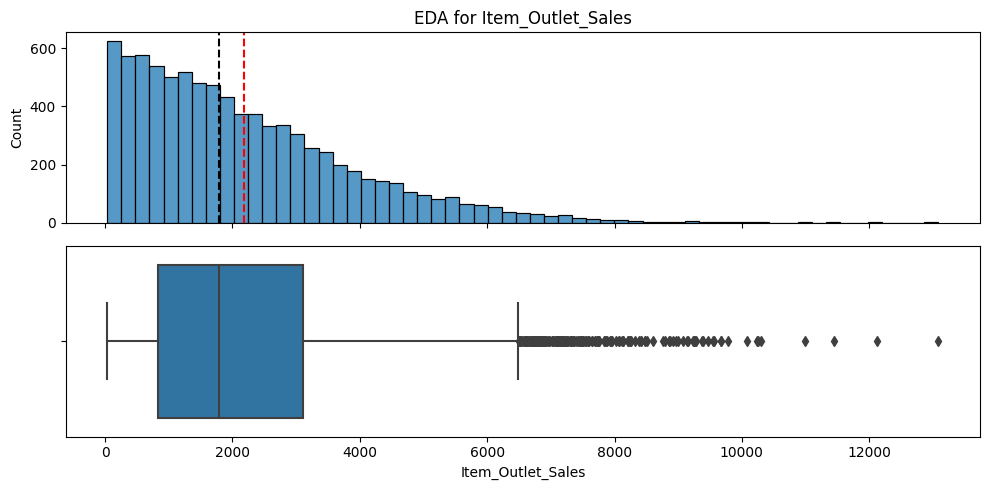

In [ ]:
plot_numeric(df_sales,'Item_Outlet_Sales')

- You can clearly see that the median is around 1800 for this particular column.
- The boxplot shows that there are some outliers in terms of Item_Outlet_Sales.

### Visualizing with Barplots
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot.

In [ ]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplota
    counts = df_sales[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


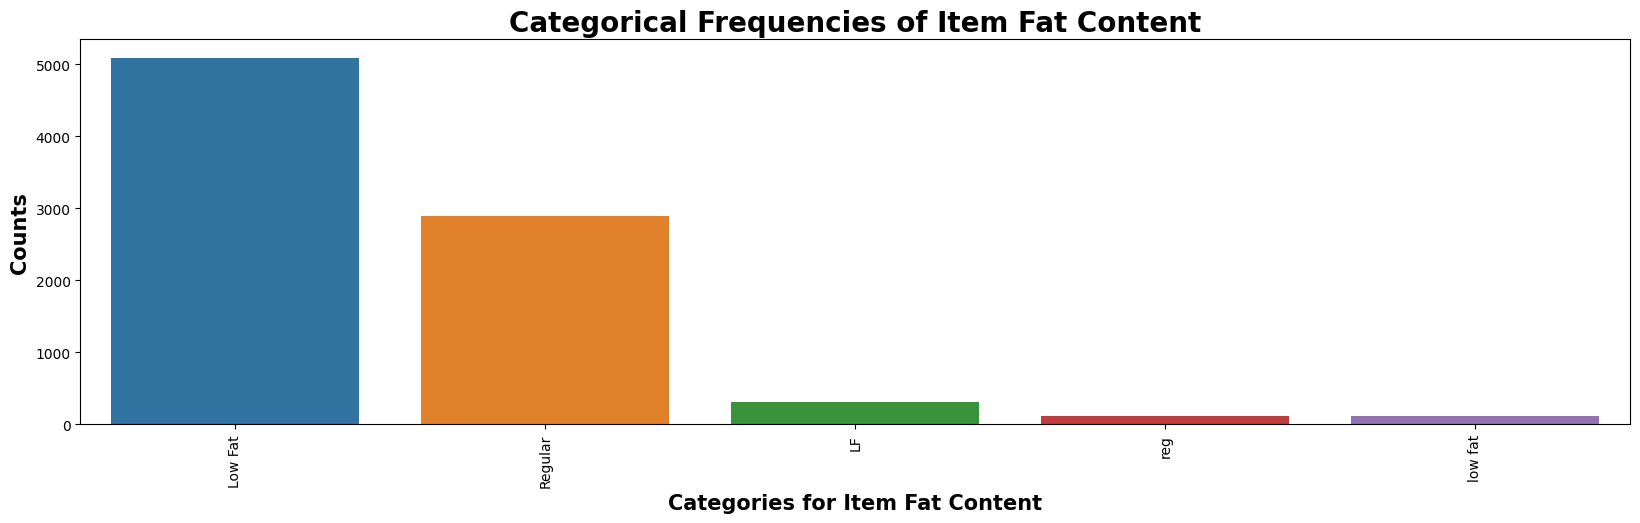

In [ ]:
fig, ax = plot_bar(df_sales, 'Item_Fat_Content', 'Item Fat Content');
print(df_sales['Item_Fat_Content'].value_counts())

- From this graph, we can see that there are mostly Low Fat content.
- Also, we see that the least amount for Item Fat Content is in the low fat category.

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


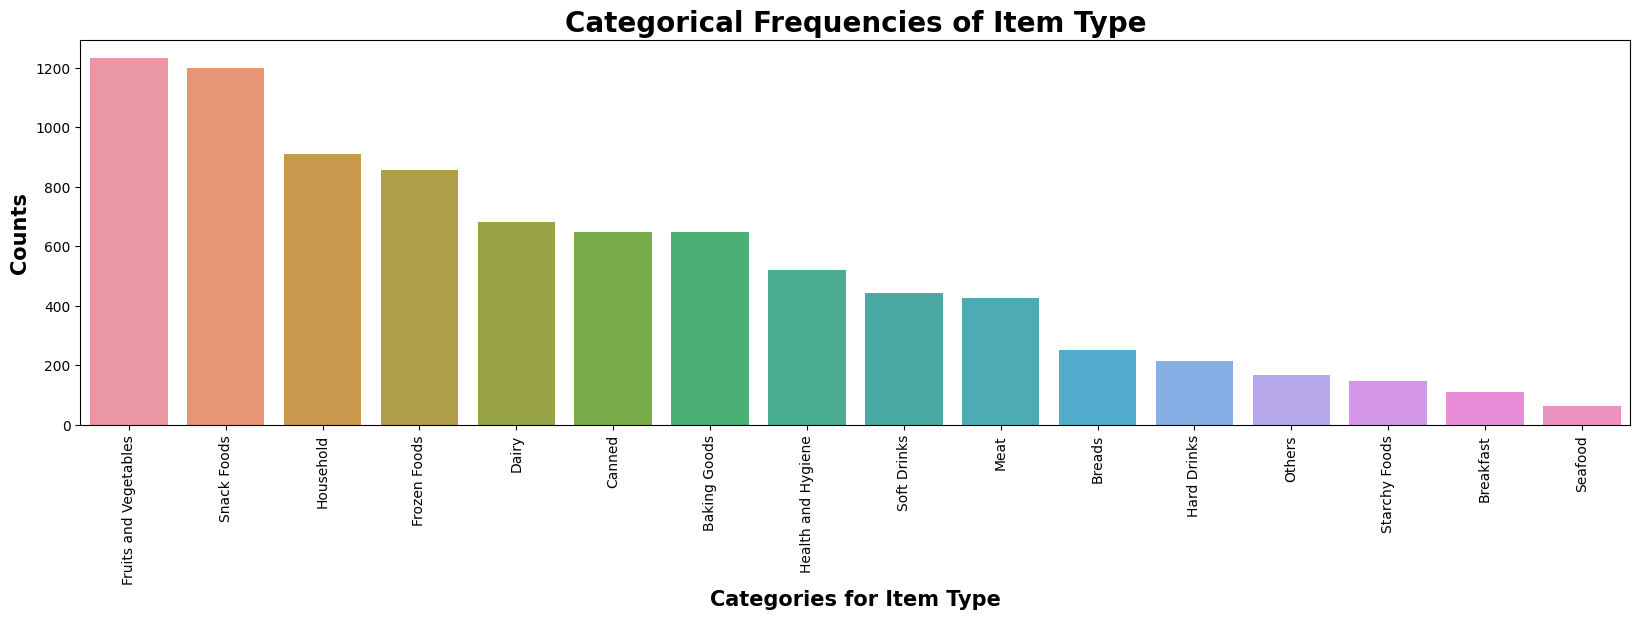

In [ ]:
fig, ax = plot_bar(df_sales, 'Item_Type', 'Item Type')
print(df_sales['Item_Type'].value_counts())

- Here we can see that the top five Type that have the most items are as follows:
  - Fruits and Vegetables
  - Snack Foods
  - Household
  - Frozen Foods
  - Dairy

- We can also see that the bottom five type that have the least of the items are as follows:
  - Seafood
  - Breakfast
  - Starchy Foods
  - Others  
  - Hard Drinks

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


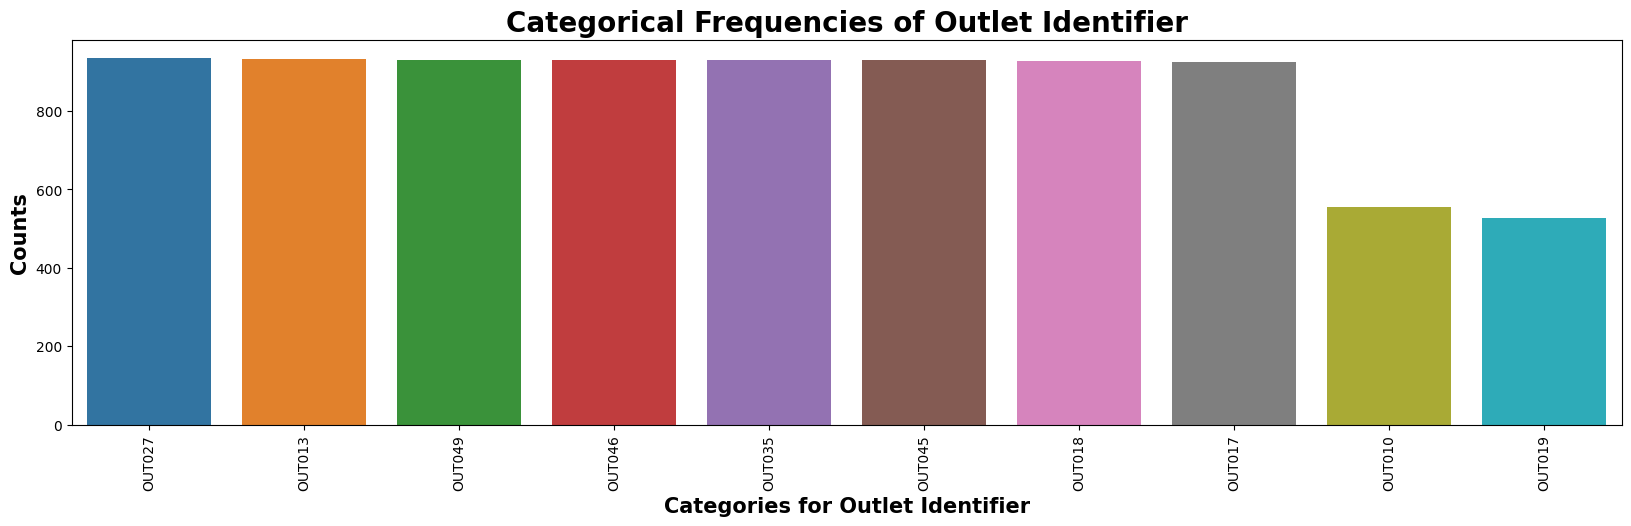

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Identifier', 'Outlet Identifier')
print(df_sales['Outlet_Identifier'].value_counts())

- Here we can see that most outlet indentifiers are OUT027. The least utlet indentifiers are OUT019.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


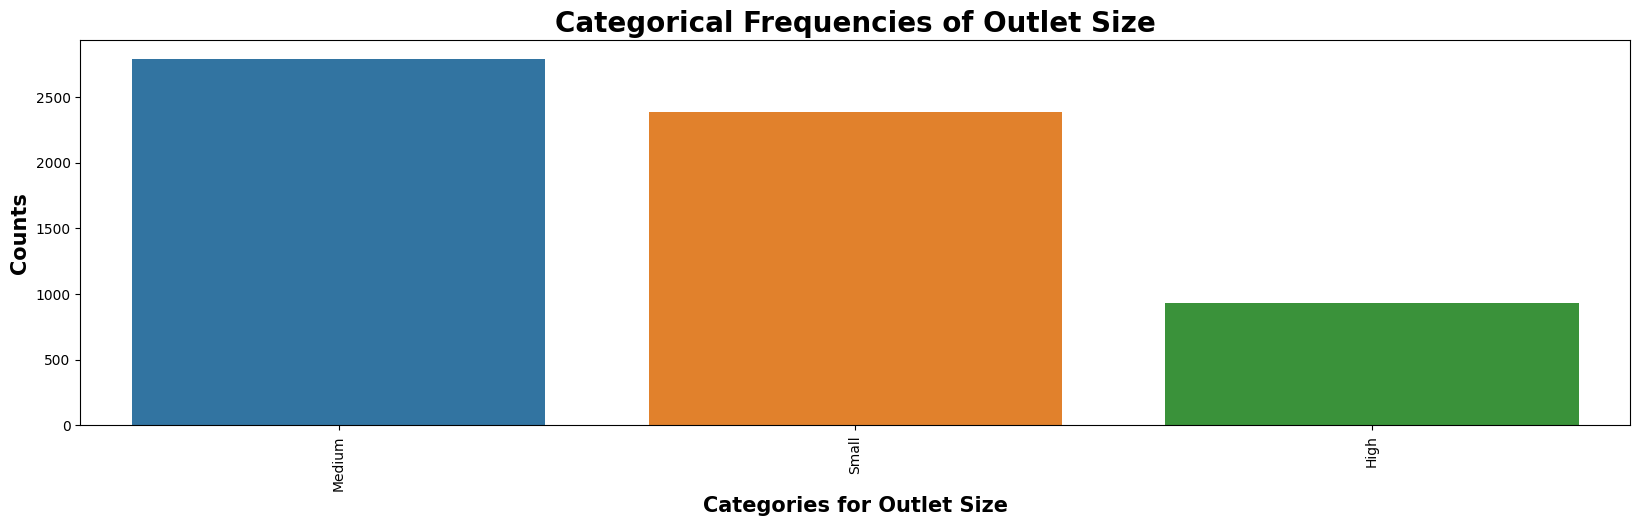

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Size', 'Outlet Size')
print(df_sales['Outlet_Size'].value_counts())

- Here we can see that most outlet indentifiers are OUT027. The least outlet indentifiers are OUT019.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


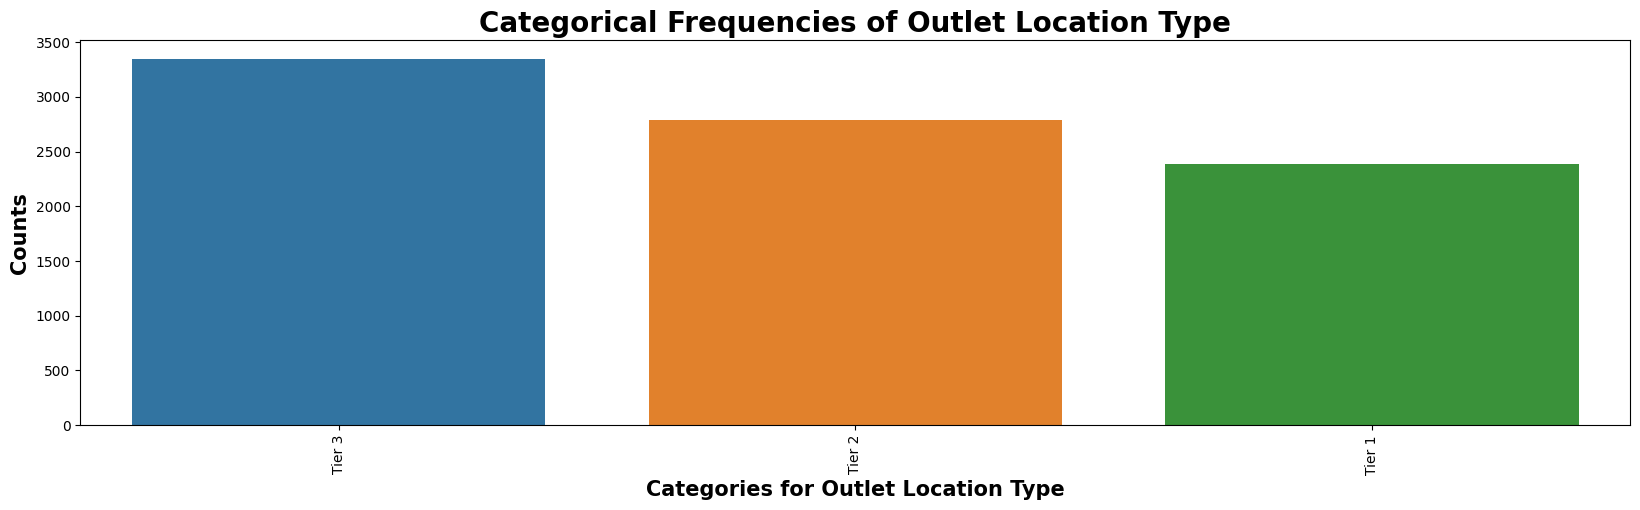

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Location_Type', 'Outlet Location Type')
print(df_sales['Outlet_Location_Type'].value_counts())

- Here we can see that most outlet location type is Tier 3. The least outlet location type is Tier 1.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


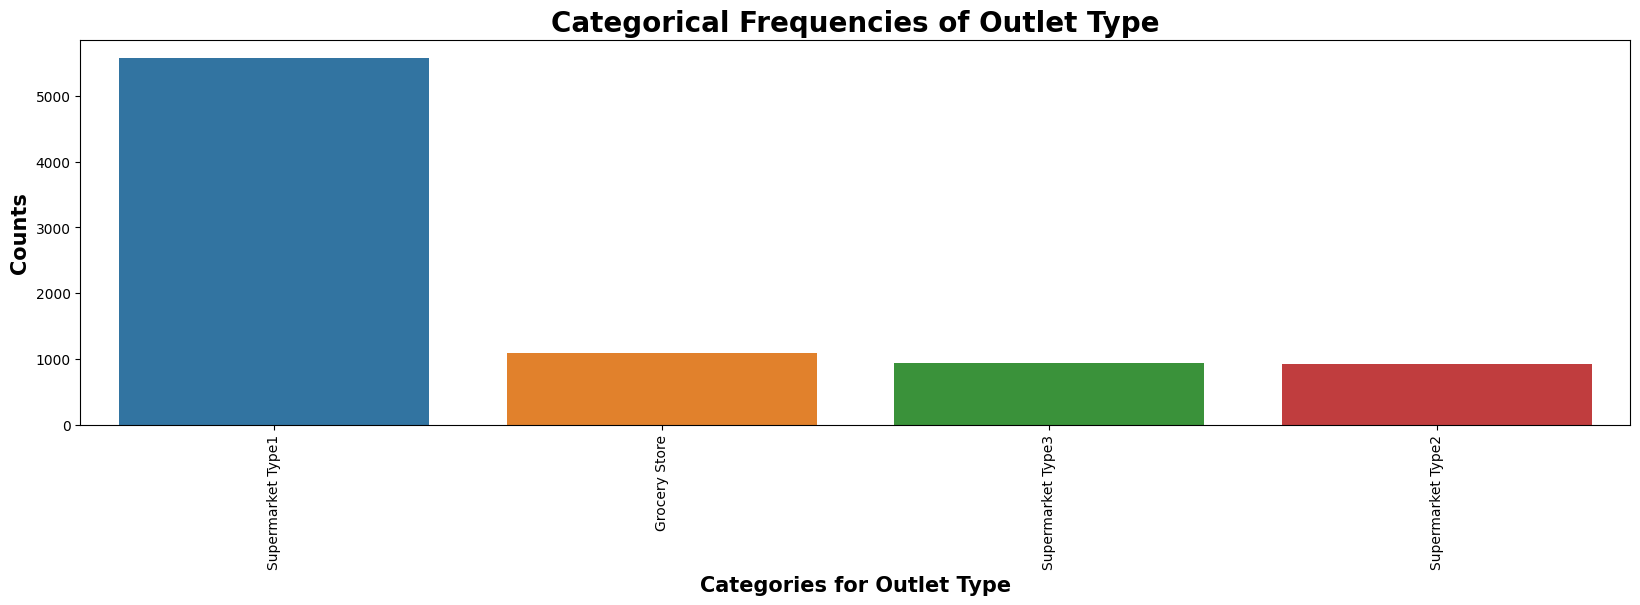

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Type', 'Outlet Type')
print(df_sales['Outlet_Type'].value_counts())

- Here we can see that most outlet type is Suppermarket Type1. The least outlet type is Supermarket Type2.

<ipython-input-46-738894e7e7ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sales.corr(),annot=True,cmap='Blues');


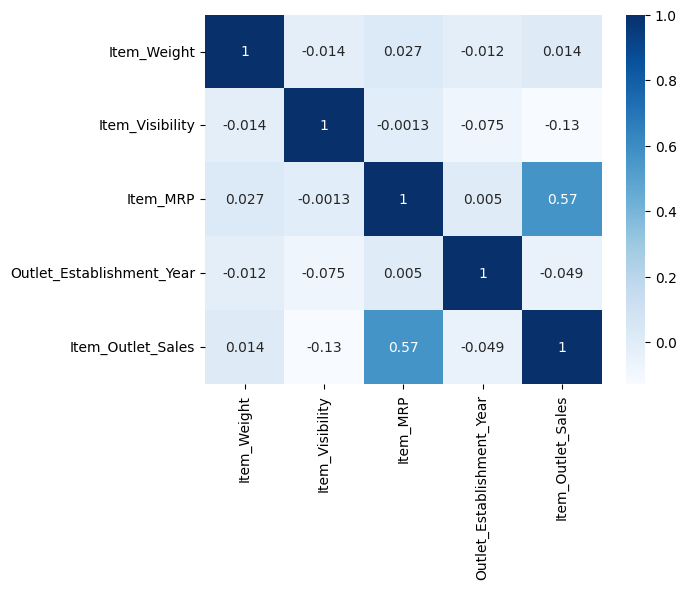

In [ ]:
sns.heatmap(df_sales.corr(),annot=True,cmap='Blues');

- There aren't really any strong or even moderate correlations shown here.
- Wwe also don't any any weak postive correlation